In [3]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import numpy as np

def save(name='', fmt='png'):
    pwd = os.getcwd()
    iPath = './pictures/{}'.format(fmt)
    if not os.path.exists(iPath):
        os.mkdir(iPath)
    os.chdir(iPath)
    plt.savefig('{}.{}'.format(name, fmt), fmt='png')
    os.chdir(pwd)
    #plt.close()

In [4]:
from random import randint
from timeit import timeit

In [5]:
import merge
import time_test

functions = [
        merge.simple_merge,
        merge.iter_merge,
        merge.gen_merge,
        merge.heapq_merge,
        merge.counter_merge,
        merge.sort_merge,
        merge.reverse_pop_merge,
        merge.pop_merge,
        ]

In [6]:
def test_time(params1, params2, number):
    """
        params: {
            'minlen': ,
            'maxlen': ,
            'minval': ,
            'maxval': ,
            }
    """
    results = {func.__name__: 0 for func in functions}

    for _ in range(number):
        len1 = randint(params1['minlen'], params1['maxlen'])
        len2 = randint(params2['minlen'], params2['maxlen'])
        list1 = sorted([randint(params1['minval'], params1['maxval']) for _ in range(len1)])
        list2 = sorted([randint(params2['minval'], params2['maxval']) for _ in range(len2)])

        for func in functions:
            results[func.__name__] += timeit('merge(list1, list2)', number=1, globals={'merge': func, 'list1': list1[:], 'list2': list2[:]})

    return results

In [30]:
def view(times, start, step, img_name, functions=functions): 
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)

    for func in functions:
        ax.plot(
            list(range(start, start + step*len(times), step)), 
            [time[func.__name__] for time in times],
            label=func.__name__
        )
        ax.grid(True)
        ax.legend()

    plt.grid(True)
    save(name=img_name)
    plt.show()

In [25]:
def view_full(times, img_name, view_functions, width=18, height=16):
    fig = plt.figure(figsize=(width, height))
    ax = fig.add_subplot(111)

    y_pos = list(range(len(view_functions)))

    ax.barh(y_pos, [times[func.__name__] for func in view_functions], align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels([func.__name__ for func in view_functions])
    ax.invert_yaxis()
    ax.set_xlabel('Время')
    ax.set_title('Общий тест')

    save(name=img_name)
    plt.show()

In [9]:
count_tests = 200

In [10]:
def time_test_full():
    params1 = {"minlen": 1, "maxlen": 100000, 'minval': 1, 'maxval': 1000000}
    params2 = {"minlen": 1, "maxlen": 100000, 'minval': 1, 'maxval': 1000000}
    results = test_time(params1, params2, count_tests)
    return results

In [11]:
def time_test_2():
    times = []
    n = 50
    for x in range(1, n+1):
        params1 = {"minlen": 50 * x, "maxlen": 50 * (x + 1), 'minval': 1, 'maxval': 10000}
        params2 = {"minlen": 50 * x, "maxlen": 50 * (x + 1), 'minval': 1, 'maxval': 10000}
        results = test_time(params1, params2, count_tests)
        times.append(results)
    return times, 50, 50

In [12]:
def time_test_3():
    times = []
    n = 50
    for x in range(1, n+1):
        params1 = {"minlen": x, "maxlen": x + 1, 'minval': 1, 'maxval': 10000}
        params2 = {"minlen": 10000 + 100 * x, "maxlen": 10000 + 100 * x, 'minval': 1, 'maxval': 10000}
        results = test_time(params1, params2, count_tests)
        times.append(results)
    return times, 50, 100

In [13]:
def time_test_4():
    n = 100
    times = []
    for x in range(1, n+1):
        params1 = {"minlen": 10000, "maxlen": 10000, 'minval': 1, 'maxval': 5 * x}
        params2 = {"minlen": 10000, "maxlen": 10000, 'minval': 1, 'maxval': 5 * x}
        results = test_time(params1, params2, count_tests)
        times.append(results)
    return times, 1, 5

In [14]:
t = time_test_full()

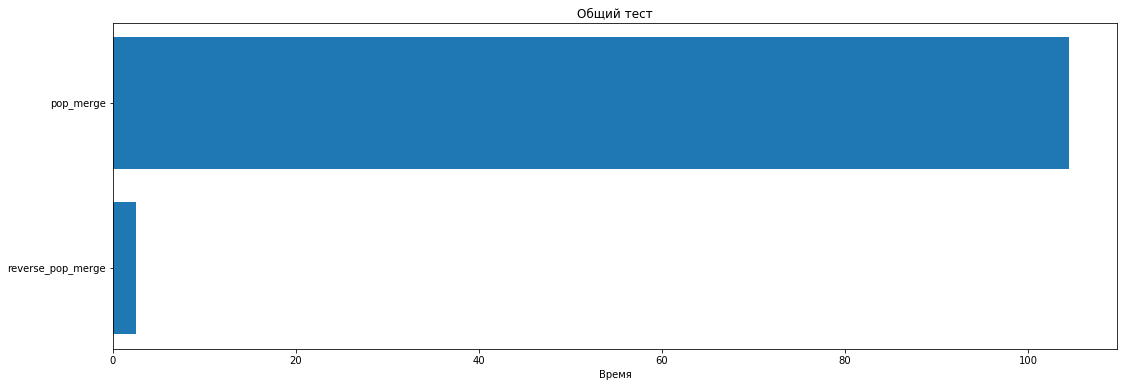

In [31]:
view_full(t, 'test_pop', [merge.pop_merge, merge.reverse_pop_merge], height=6)

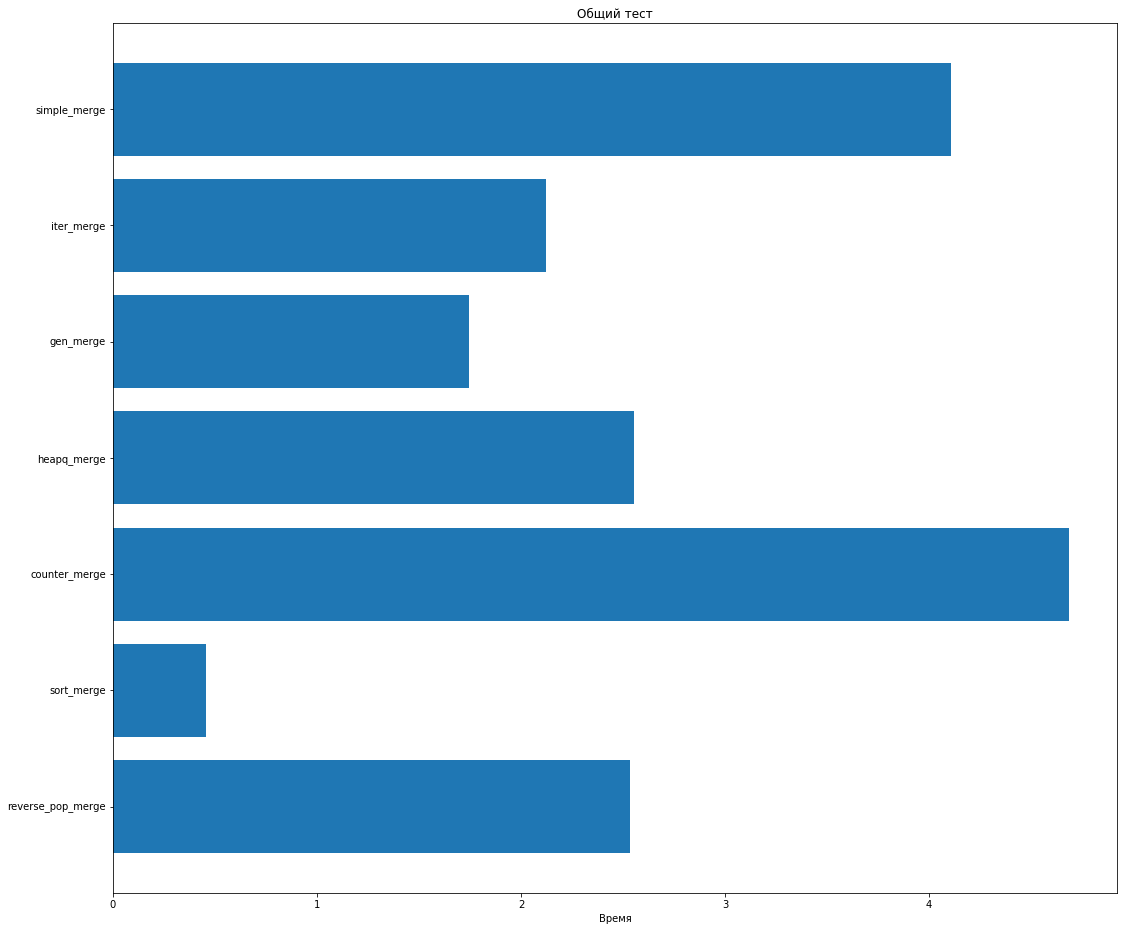

In [32]:
view_full(t, 'test_full', functions[:-1])

In [18]:
t2 = time_test_2()

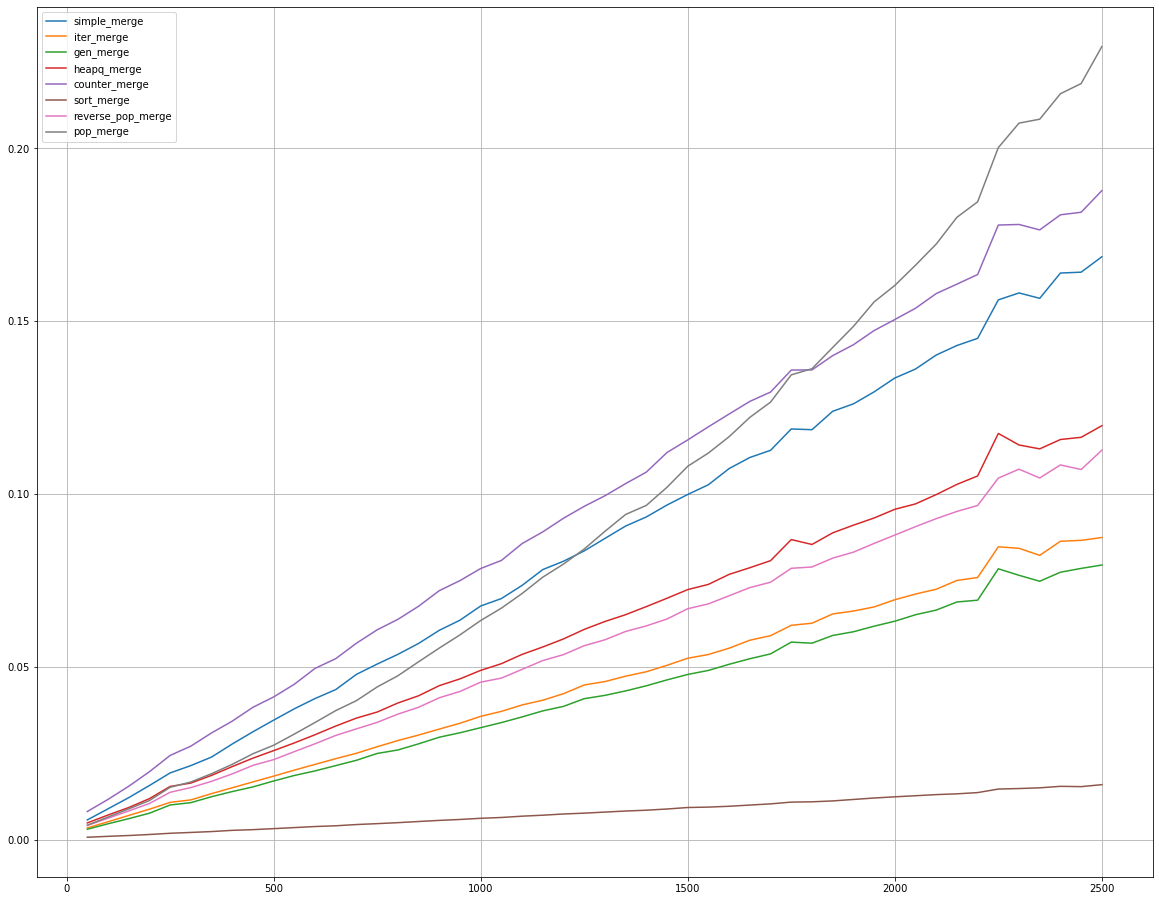

In [19]:
view(*t2, 'test2')

In [20]:
t3 = time_test_3()

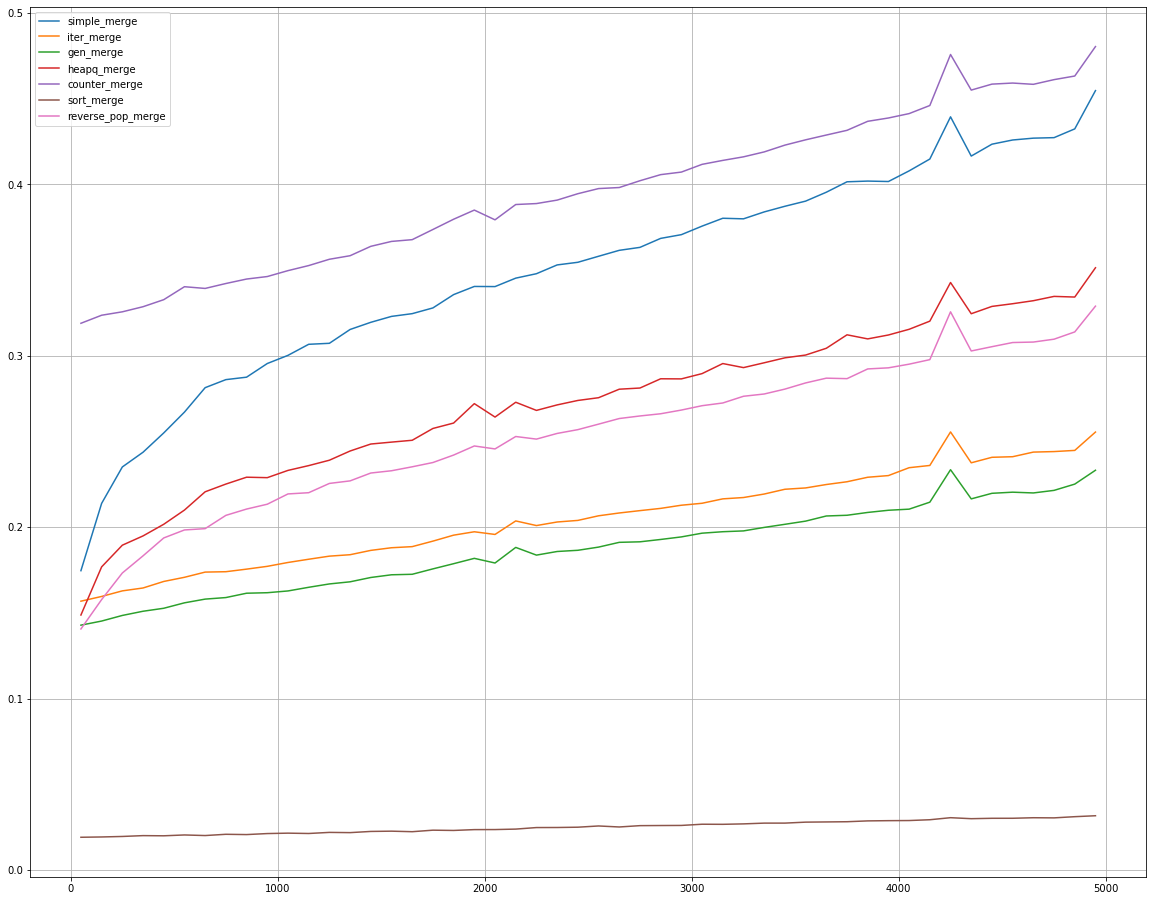

In [21]:
view(*t3, 'test3', functions=functions[:-1])

In [22]:
t4 = time_test_4()

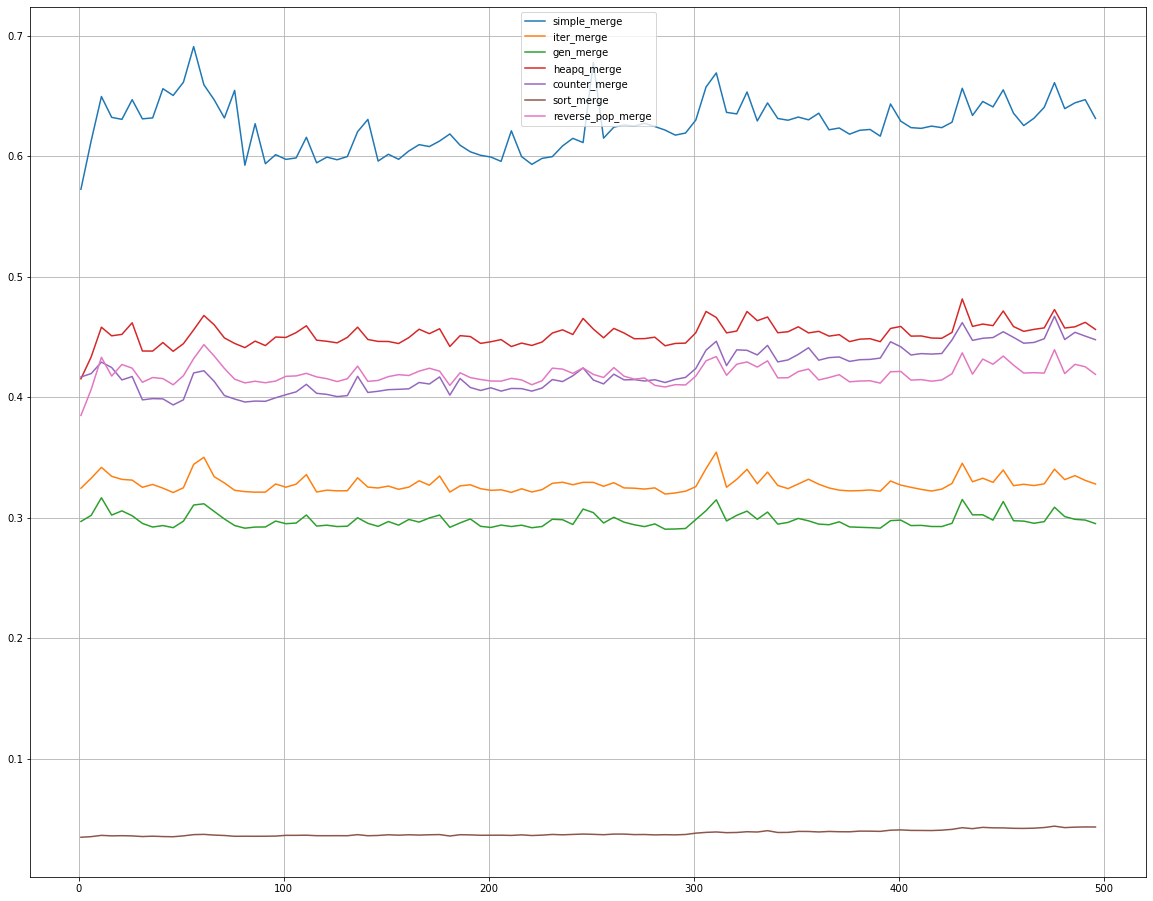

In [23]:
view(*t4, 'test4', functions=functions[:-1])